Find Player: (Enter to Skip.)


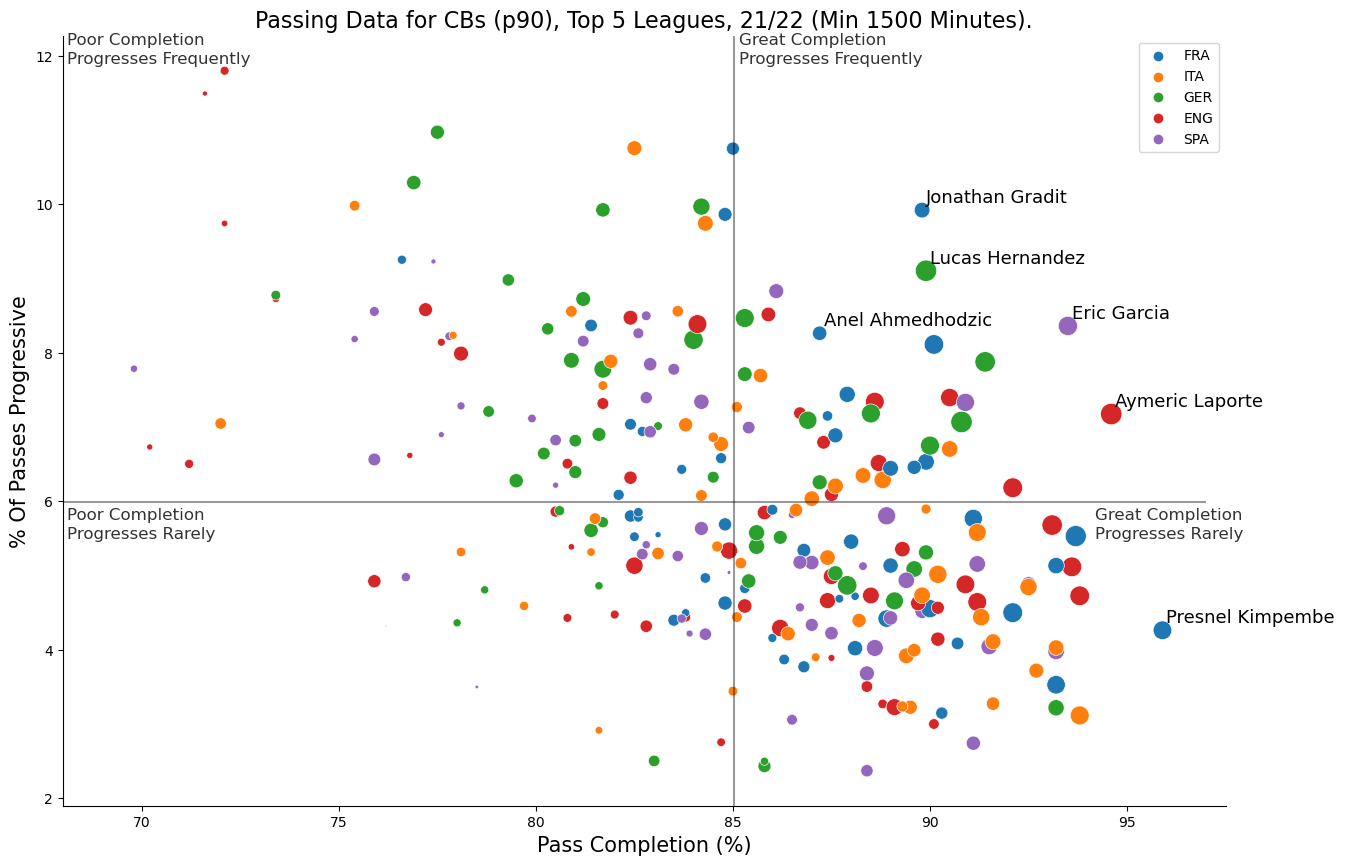

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import pandas as pd
from matplotlib import rcParams

Names = []
League = []
Pass_Attempts = []
Pass_Attempts_Adj = []
Pass_Completion = []
Prog_Passes = []
Corner_Labels = ['Poor Completion', 'Great Completion', 'Progresses Rarely', 'Progresses Frequently']
x = []
y = []
Players_Find = [0]

data = pd.read_csv("C:/Users/Tomlo/OneDrive/Documents/Py/Defenders1.csv")
data.head()

for a in range (len(data)):
    Names.append(data.Player[a])
    League.append(data.League[a])
    Pass_Attempts.append(data.Pass_Attempts[a])
    Pass_Completion.append(data.Pass_Completion[a])
    Prog_Passes.append(data.Prog_Passes[a])

for z in range (len(Names)):
    Prog_Adj = (float(Prog_Passes[z])/(float(Pass_Attempts[z])*(float(Pass_Completion[z])/100))) *100
    y.append(Prog_Adj)
    x.append(Pass_Completion[z])

for pa in range (len(x)):
    Pass_Attempts_Adj.append(((Pass_Attempts[pa])-29)*4)

inputted = False
while inputted == False:
    inp = input('Find Player: (Enter to Skip.)')
    if inp != '':
        for f in range (len(x)):
            if inp == Names[f]:
                Players_Find.append(f)
    if inp == '':
        inputted = True

rcParams['figure.figsize'] = 15,10
sns.scatterplot(x=x, y=y, s=Pass_Attempts_Adj, hue = League)
plt.title('Passing Data for CBs (p90), Top 5 Leagues, 21/22 (Min 1500 Minutes).', fontsize=16)
plt.xlabel('Pass Completion (%)', fontsize=15)
plt.ylabel('% Of Passes Progressive', fontsize=15)

for r in range (len(x)):
    if x[r] > 92.5 and y[r]>7:
        plt.annotate(Names[r], (((x[r])+0.1),((y[r])+0.1)), fontsize=13)
    if x[r] > 95:
        plt.annotate(Names[r], (((x[r])+0.1),((y[r])+0.1)), fontsize=13)
    if x[r] > 85 and y[r]>9:
        plt.annotate(Names[r], (((x[r])+0.1),((y[r])+0.1)), fontsize=13)

for g in range (len(Players_Find)):
    plt.annotate(Names[Players_Find[g]], ((float((x[Players_Find[g]]))+0.1),((float(y[Players_Find[g]])+0.1))), fontsize=13)
    
Pass_Completion_Average = 0
for b in range (len(x)):
    Pass_Completion_Average = Pass_Completion_Average + Pass_Completion[b]
Pass_Completion_Average = Pass_Completion_Average/(len(x))

Prog_Average = 0
for c in range(len(x)):
    Prog_Average = Prog_Average + y[c]
Prog_Average = Prog_Average/len(x)

plt.axvline(Pass_Completion_Average, 0, 12, color = 'black', alpha = 0.4)
plt.hlines(Prog_Average, 68, 97, color = 'black', alpha = 0.4)

plt.annotate(Corner_Labels[0], (68.1,5.75), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[2], (68.1,5.5), fontsize=12, alpha = 0.8)

plt.annotate(Corner_Labels[0], (68.1,12.15), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[3], (68.1,11.9), fontsize=12, alpha = 0.8)

plt.annotate(Corner_Labels[1], (85.15,12.15), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[3], (85.15,11.9), fontsize=12, alpha = 0.8)

plt.annotate(Corner_Labels[1], (94.2,5.75), fontsize=12, alpha = 0.8)
plt.annotate(Corner_Labels[2], (94.2,5.5), fontsize=12, alpha = 0.8)

plt.xlim(68,97.5)
sns.despine()
plt.show()